In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features = polynomial_converter.transform(X)

In [14]:
poly_features.shape

(200, 9)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,test_predictions)

In [29]:
MSE = mean_squared_error(y_test,test_predictions)

In [31]:
RMSE = np.sqrt(MSE)

In [32]:
MAE 

0.48967980448035126

In [33]:
RMSE

0.6646431757268959

In [34]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [35]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [36]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [37]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):

    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [38]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902068,
 0.35170836883993534,
 0.2509342968765002,
 0.19342866162478942,
 5.422368922665441,
 0.14455844820531974,
 0.16709838173948835]

In [39]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757268959,
 0.5803286825226518,
 0.5077742648695376,
 2.575825184034272,
 4.382548933641848,
 1377.993135827312,
 4894.148641855067,
 93341.68441538418]

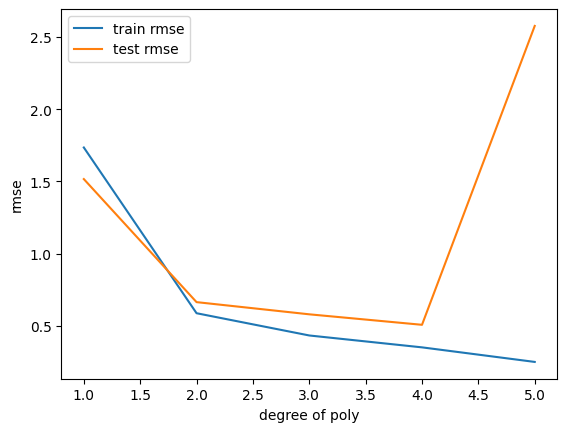

In [43]:
plt.plot(range(1,6),train_rmse_errors[:5],label='train rmse')
plt.plot(range(1,6),test_rmse_errors[:5],label='test rmse')


plt.ylabel('rmse')
plt.xlabel('degree of poly')
plt.legend()

In [44]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [45]:
final_model = LinearRegression()

In [46]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [47]:
from joblib import dump,load

In [48]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [49]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [50]:
loaded_converter = load('final_converter.joblib')

In [51]:
loaded_model = load('final_poly_model.joblib')

In [52]:
campaign = [[149,22,12]]

In [54]:
transformed_data = loaded_converter.fit_transform(campaign)

In [55]:
loaded_model.predict(transformed_data)

array([14.64501014])